# Exploratory Data Analysis

In [66]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
from utils.load_dotenv import load_dotenv
from utils.constants import _SEASONS

In [51]:
load_dotenv()

True

In [52]:
RAW_DIR = os.getenv("RAW_DIR")
DATASET_DIR = os.getenv("DATASETS_DIR")
PROCESSED_DIR = os.getenv("PROCESSED_DIR")

WEATHER_DATASET = output_path = os.path.join(DATASET_DIR, "weather_sj_2010_2024.csv")

In [53]:
df = pd.read_csv(WEATHER_DATASET)

In [54]:
# Converting datetime to datetime objects
df["datetime"] = pd.to_datetime(df["datetime"])

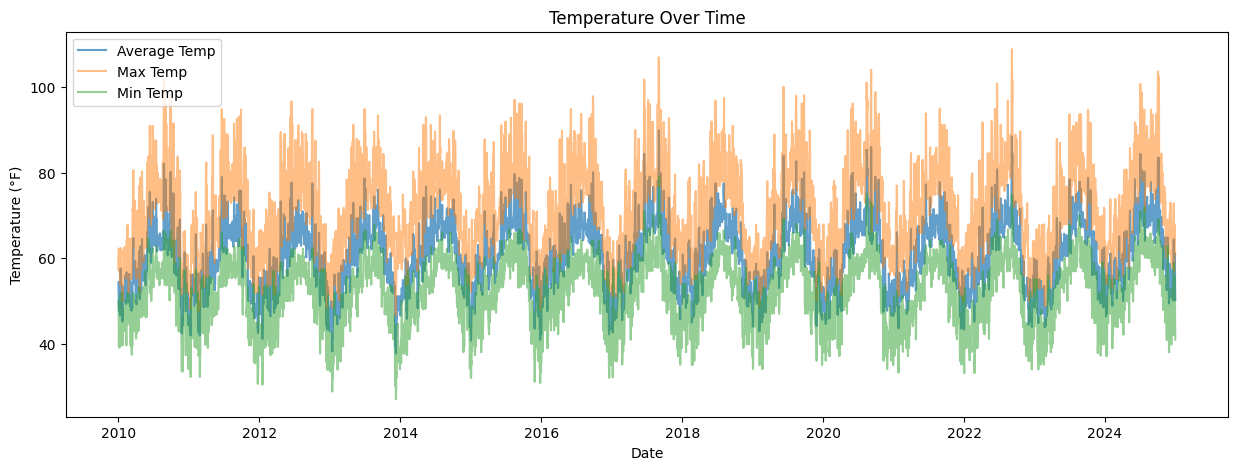

In [55]:
# Plot temperature trends over time
plt.figure(figsize=(15, 5))
plt.plot(df['datetime'], df['temp'], label='Average Temp', alpha=0.7)
plt.plot(df['datetime'], df['tempmax'], label='Max Temp',  alpha=0.5)
plt.plot(df['datetime'], df['tempmin'], label='Min Temp',  alpha=0.5)
plt.legend()
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

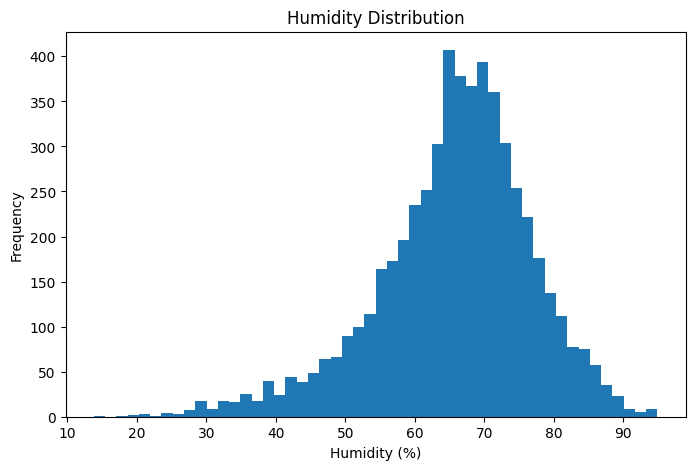

In [56]:
# Show humidity distribution
df['humidity'].plot(kind='hist', bins=50, title='Humidity Distribution', figsize=(8,5))
plt.xlabel('Humidity (%)')
plt.show()

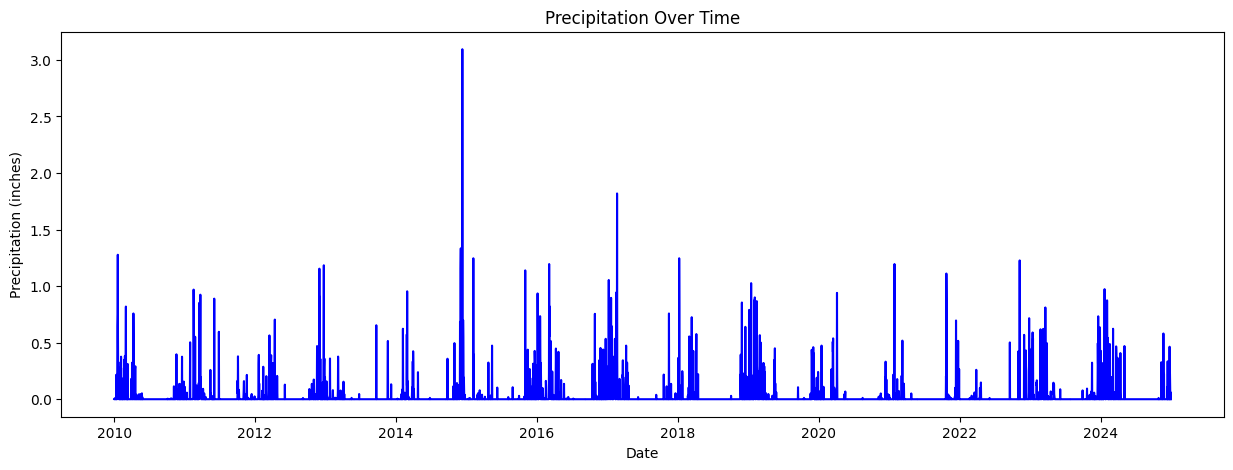

In [57]:
# Show rain trend
plt.figure(figsize=(15, 5))
plt.plot(df['datetime'], df['precip'], label='Precipitation', color='blue')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

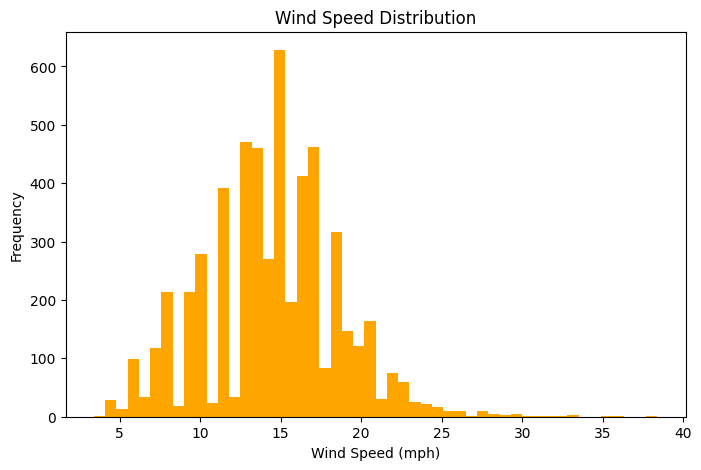

In [58]:
# Show wind speed distribution
df['windspeed'].plot(kind='hist', bins=50, color='orange', title='Wind Speed Distribution', figsize=(8,5))
plt.xlabel('Wind Speed (mph)')
plt.show()

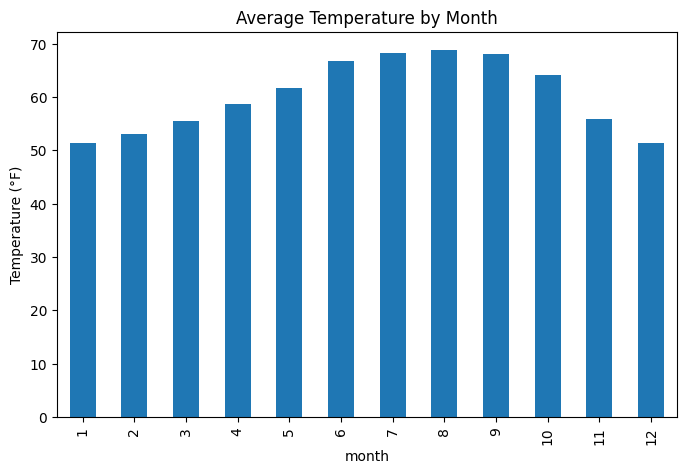

In [59]:
# Monthly average temperature
df['month'] = df['datetime'].dt.month

monthly_temp = df.groupby('month')['temp'].mean()

monthly_temp.plot(kind='bar', title='Average Temperature by Month', figsize=(8,5))
plt.ylabel('Temperature (°F)')
plt.show()

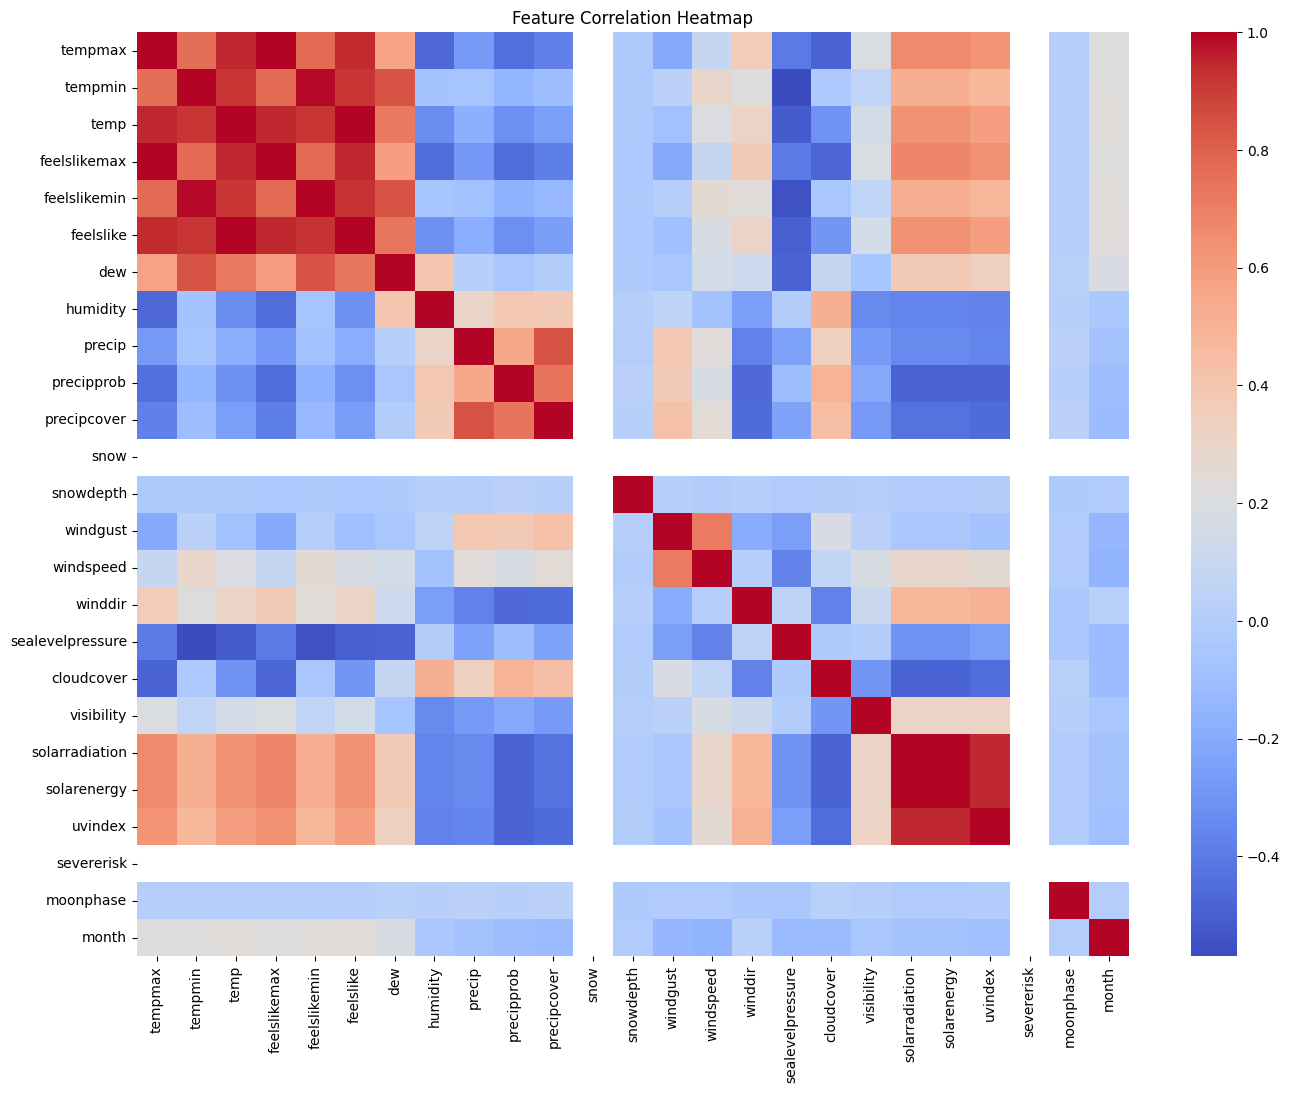

In [60]:
# Numerical feature heatmap
plt.figure(figsize=(16,12))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


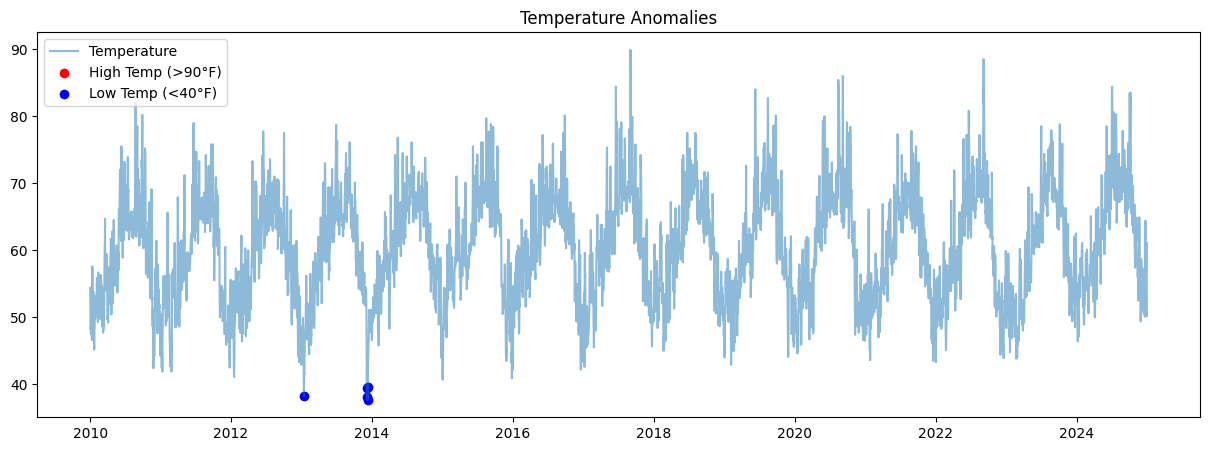

In [61]:
# Temperature anomalies
plt.figure(figsize=(15,5))
plt.plot(df['datetime'], df['temp'], label='Temperature', alpha=0.5)
high_temp = df[df['temp'] > 90]
low_temp = df[df['temp'] < 40]
plt.scatter(high_temp['datetime'], high_temp['temp'], color='red', label='High Temp (>90°F)')
plt.scatter(low_temp['datetime'], low_temp['temp'], color='blue', label='Low Temp (<40°F)')
plt.legend()
plt.title('Temperature Anomalies')
plt.show()


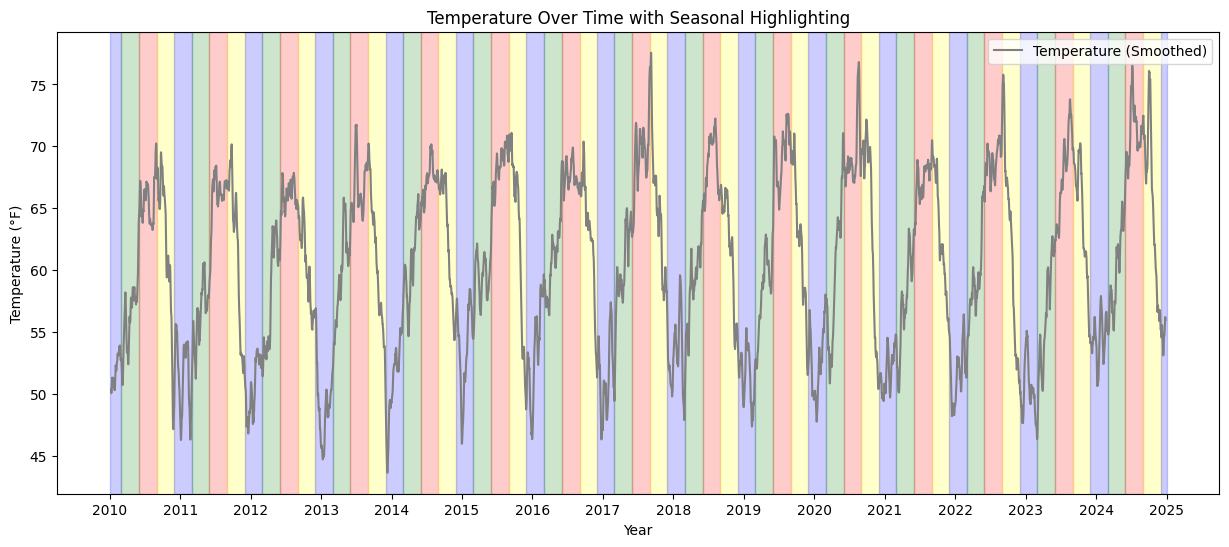

In [85]:
# Showing temperature over time with seasons
def get_season(month):
    for season, months in _SEASONS.items():
        if month in months:
            return season


df['temp_smooth'] = df['temp'].rolling(window=14, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df['datetime'], df['temp_smooth'], label='Temperature (Smoothed)', color='gray')

season_colors = {
    "Winter": "blue",
    "Spring": "green",
    "Summer": "red",
    "Fall": "yellow",
}

df["season"] = df["datetime"].dt.month.map(get_season)

season_changes = df["season"] != df["season"].shift()
season_periods = df.loc[season_changes, ["datetime", "season"]].reset_index()

last_row = pd.DataFrame(
    {"index": [len(df) - 1], "datetime": [df["datetime"].iloc[-1]], "season": [None]}
)
season_periods = pd.concat([season_periods, last_row], ignore_index=True)

for i in range(len(season_periods) - 1):
    start_date = season_periods.loc[i, "datetime"]
    end_date = season_periods.loc[i + 1, "datetime"]
    season = season_periods.loc[i, "season"]
    if pd.notna(season):
        ax.axvspan(start_date, end_date, color=season_colors[season], alpha=0.2)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.title("Temperature Over Time with Seasonal Highlighting")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.show()